In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_with_top_labels(df, value_column, label_column='gene_pair', title=None, bins=30, color='mediumseagreen'):
    """
    Plot a histogram of a numeric column from a single DataFrame and annotate the top two x-axis values
    with their corresponding labels from a second column.

    Parameters:
    - df: pandas DataFrame with at least [value_column, label_column]
    - value_column: str, name of numeric column to histogram
    - label_column: str, column containing labels for annotation (e.g., 'gene_pair')
    - title: str, title for the plot
    - bins: int, number of histogram bins
    - color: str, color of the histogram
    """
    plt.figure(figsize=(12, 6))

    # Plot the histogram
    sns.histplot(df[value_column], bins=bins, kde=False, color=color, alpha=0.7)

    # Find top 2 max x-axis values
    top_indices = df[value_column].nlargest(2).index
    for i, idx in enumerate(top_indices):
        x = df.loc[idx, value_column]
        label = df.loc[idx, label_column]
        plt.annotate(
            label,
            xy=(x, 0),
            xytext=(x, 5 + i),  # stack labels slightly
            arrowprops=dict(arrowstyle='->', lw=1),
            ha='center',
            fontsize=15,
            color='black'
        )

    # Final plot formatting
    plt.xlabel(value_column, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.tick_params(labelsize=15)

    plt.title(title or f'Histogram of ipTM Scores for Gene Pairs Identified by Walktrap Clustering', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("walktrap_histogram.png", dpi=300)
    plt.show()


In [42]:
#####
# FROM TOP 182 PAIR SUBSET
#####

import pandas as pd
df = pd.read_csv('iptm_values.csv')

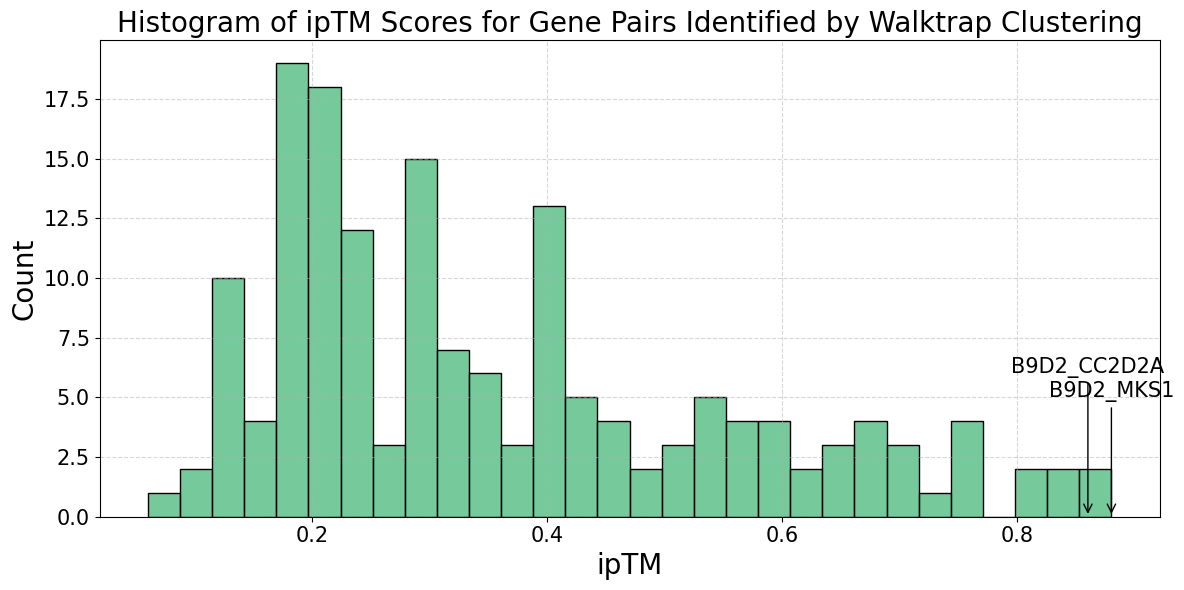

In [43]:
plot_histogram_with_top_labels(df, 'ipTM', label_column='Gene_Pair', title=None, bins=30, color='mediumseagreen')